# Remy Wang

## Research Question/ Interest

### How do aspects in the personal profile indicated by gender, education, marital status, and age in this dataset individually determine the number of months for payment delay? 
* Which category in the sex group affects the length of payment delay the most?
* How is the feature of the education level affect the length of payment delay?
* Which martial status caused payment delay the most?
* How will age determine the length of payment delay?

##### My analysis plan will be first dropping all the columns involved with the amount of the given credit (NT dollar), amount of bill statement (NT dollar), and amount of previous payment (NT dollar). The rest of the data frame will be saved into a new data frame and the first index column will be removed. Next, the column names for the new data frame will be renamed to more representative terms. In addition, rows with exceptional or missing values in the new data frame will also be removed. The new column which contains the average numbers of payback months from the past payment history will be created. Furthermore, one categorical variable and one numerical variable such as marital status and the average numbers of payback months will be grouped together then side-by-side, and grouped boxplots will be plotted for visualizations. 



In [1]:
import pandas as pd
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop('Unnamed: 0',axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Exploratory Data Analysis (EDA)

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df.shape

(30001, 25)

In [4]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
# Check to see the column name
second_columnn_name=df.iloc[0:1]
second_columnn_name

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [6]:
df.nunique(axis=0)

Unnamed: 0    30001
X1               82
X2                3
X3                8
X4                5
X5               57
X6               12
X7               12
X8               12
X9               12
X10              11
X11              11
X12           22724
X13           22347
X14           22027
X15           21549
X16           21011
X17           20605
X18            7944
X19            7900
X20            7519
X21            6938
X22            6898
X23            6940
Y                 3
dtype: int64

In [7]:
df.describe().T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


In [8]:
# Drop redudant variables
df2=df.drop(['Unnamed: 0','X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
df2

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,39,0,0,0,0,0,0
29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,1,2,2,37,4,3,2,-1,0,0
29999,1,3,1,41,1,-1,0,0,0,-1


In [9]:
# Renaming the first index row to more reasonable name
df3=df2.rename({'X2':'Sex','X3':'Education','X4':'Marriage','X5':'Age','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
df3

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,39,0,0,0,0,0,0
29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,1,2,2,37,4,3,2,-1,0,0
29999,1,3,1,41,1,-1,0,0,0,-1


In [10]:
# Drop the duplicate column name row and reset the index
df4=df3.iloc[1:].reset_index(drop=True)
df4

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,24,2,2,-1,-1,-2,-2
1,2,2,2,26,-1,2,0,0,0,2
2,2,2,2,34,0,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,39,0,0,0,0,0,0
29996,1,3,2,43,-1,-1,-1,-1,0,0
29997,1,2,2,37,4,3,2,-1,0,0
29998,1,3,1,41,1,-1,0,0,0,-1


In [11]:
# Replace the number variables in the categorical column to more reasonabel name
df4['Sex']=df4['Sex'].replace([1,2],['male','female'])
df4['Education']=df4['Education'].replace([1,2,3,4],['graduate school','university', 'high school','others'])
df4['Marriage']=df4['Marriage'].replace([1,2,3],['married','single','others'])
df4

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,female,university,married,24,2,2,-1,-1,-2,-2
1,female,university,single,26,-1,2,0,0,0,2
2,female,university,single,34,0,0,0,0,0,0
3,female,university,married,37,0,0,0,0,0,0
4,male,university,married,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,male,high school,married,39,0,0,0,0,0,0
29996,male,high school,single,43,-1,-1,-1,-1,0,0
29997,male,university,single,37,4,3,2,-1,0,0
29998,male,high school,married,41,1,-1,0,0,0,-1


In [12]:
# Check variables' types in df4
df4.dtypes

Sex          object
Education    object
Marriage     object
Age          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
dtype: object

In [13]:
# Change numerical column's type into numeric
df4[['Age','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]=df4[['Age','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].apply(pd.to_numeric)
df4.dtypes

Sex          object
Education    object
Marriage     object
Age           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
dtype: object

In [14]:
df4['Sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df4['Education'].unique()

array(['university', 'graduate school', 'high school', 5, 'others', 6, 0],
      dtype=object)

In [16]:
df4['Marriage'].unique()

array(['married', 'single', 'others', 0], dtype=object)

In [17]:
df4['Age'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [18]:
df4['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [19]:
df4['PAY_2'].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

In [20]:
df4['PAY_3'].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8])

In [21]:
df4['PAY_4'].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8])

In [22]:
df4['PAY_6'].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [23]:
# Removing rows which contain unusual values
df5=(df4
    .loc[lambda x: x['Marriage']!=0]
    .loc[lambda x: x['Education']!=0]
    .loc[lambda x: x['Education']!=5]
    .loc[lambda x: x['Education']!=6]
    .reset_index(drop=True)
    )
df5

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,female,university,married,24,2,2,-1,-1,-2,-2
1,female,university,single,26,-1,2,0,0,0,2
2,female,university,single,34,0,0,0,0,0,0
3,female,university,married,37,0,0,0,0,0,0
4,male,university,married,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0
29597,male,high school,single,43,-1,-1,-1,-1,0,0
29598,male,university,single,37,4,3,2,-1,0,0
29599,male,high school,married,41,1,-1,0,0,0,-1


In [24]:
# Drop rows with NaNs
df6=df5.dropna(axis=0)
df6.shape

(29601, 10)

In [25]:
# Add the new column about the average months of repayment
df7=df6
df7['Average_Repayment_Status']=df6[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
df7

,Sex,Education,Marriage,Age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Average_Repayment_Status
0,female,university,married,24,2,2,-1,-1,-2,-2,-0.333333
1,female,university,single,26,-1,2,0,0,0,2,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,-1,0,-1,0,0,0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,-1,-1,-1,-1,0,0,-0.666667
29598,male,university,single,37,4,3,2,-1,0,0,1.333333
29599,male,high school,married,41,1,-1,0,0,0,-1,-0.166667


In [26]:
# Renaming the numerical column to more reasonable name and change the order
df8=df7.rename({'PAY_0':'Repayment_Status_September,2005','PAY_2':'Repayment_Status_August,2005','PAY_3':'Repayment_Status_July,2005','PAY_4':'Repayment_Status_June,2005','PAY_5':'Repayment_Status_May,2005','PAY_6':'Repayment_Status_April,2005'},axis='columns')
df9=df8[['Sex', 'Education', 'Marriage', 'Age','Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005','Average_Repayment_Status']]
df9

,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


In [27]:
df9.shape

(29601, 11)

In [28]:
df_categorical_columns=df9.describe(exclude=[np.number]).T
df_categorical_columns

,count,unique,top,freq
Sex,29601,2,female,17855
Education,29601,4,university,14024
Marriage,29601,3,single,15806


In [29]:
df_numerical_columns=df9.describe(include=[np.number]).T
df_numerical_columns

,count,mean,std,min,25%,50%,75%,max
Age,29601.0,35.464072,9.213243,21.0,28.000000,34.0,41.0,79.0
"Repayment_Status_April,2005",29601.0,-0.287558,1.152206,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_May,2005",29601.0,-0.263978,1.136217,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_June,2005",29601.0,-0.218303,1.172220,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_July,2005",29601.0,-0.163440,1.199793,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_August,2005",29601.0,-0.131313,1.199642,-2.0,-1.000000,0.0,0.0,8.0
"Repayment_Status_September,2005",29601.0,-0.014932,1.124503,-2.0,-1.000000,0.0,0.0,8.0
Average_Repayment_Status,29601.0,-0.179921,0.984192,-2.0,-0.833333,0.0,0.0,6.0


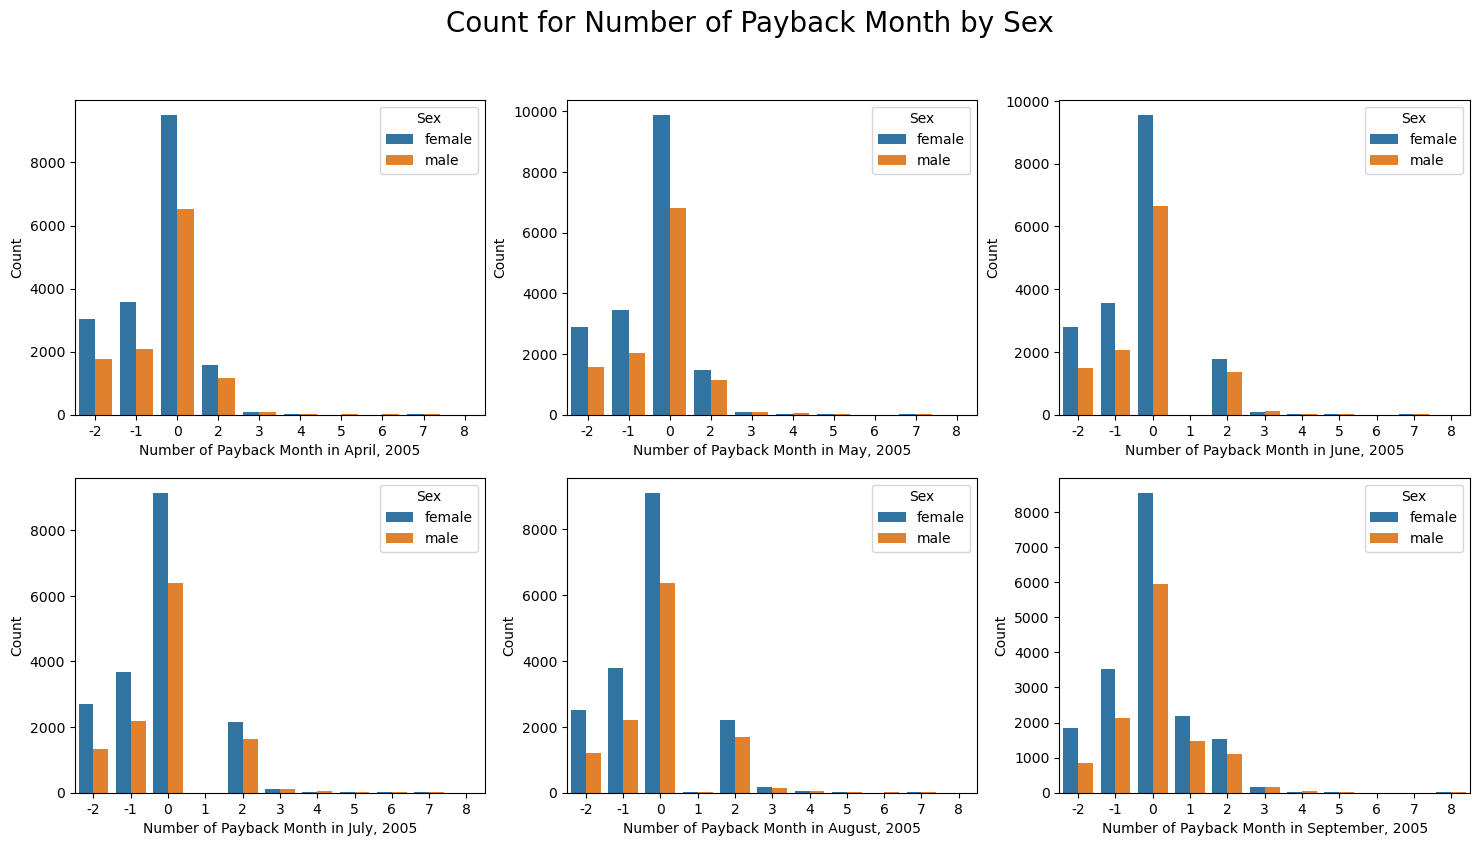

In [30]:
fig=plt.figure(figsize=(18,9))
fig.suptitle("Count for Number of Payback Month by Sex", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='Repayment_Status_April,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Count')
plt.subplot(2,3,2)
sns.countplot(x='Repayment_Status_May,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Count')
plt.subplot(2,3,3)
sns.countplot(x='Repayment_Status_June,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Count')
plt.subplot(2,3,4)
sns.countplot(x='Repayment_Status_July,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Count')
plt.subplot(2,3,5)
sns.countplot(x='Repayment_Status_August,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Count')
plt.subplot(2,3,6)
sns.countplot(x='Repayment_Status_September,2005',hue='Sex',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Count')
plt.show()

- This set of count plots shows the count of sample clients based on their gender for how many months they used to pay back their credit cards.
- Most of the sample clients in both gender groups paid their bills no later than two months, and the counts for repayment status divided by gender look similar to each other across April to September in 2005. Obvious correlations are not presented in this group of plots. 

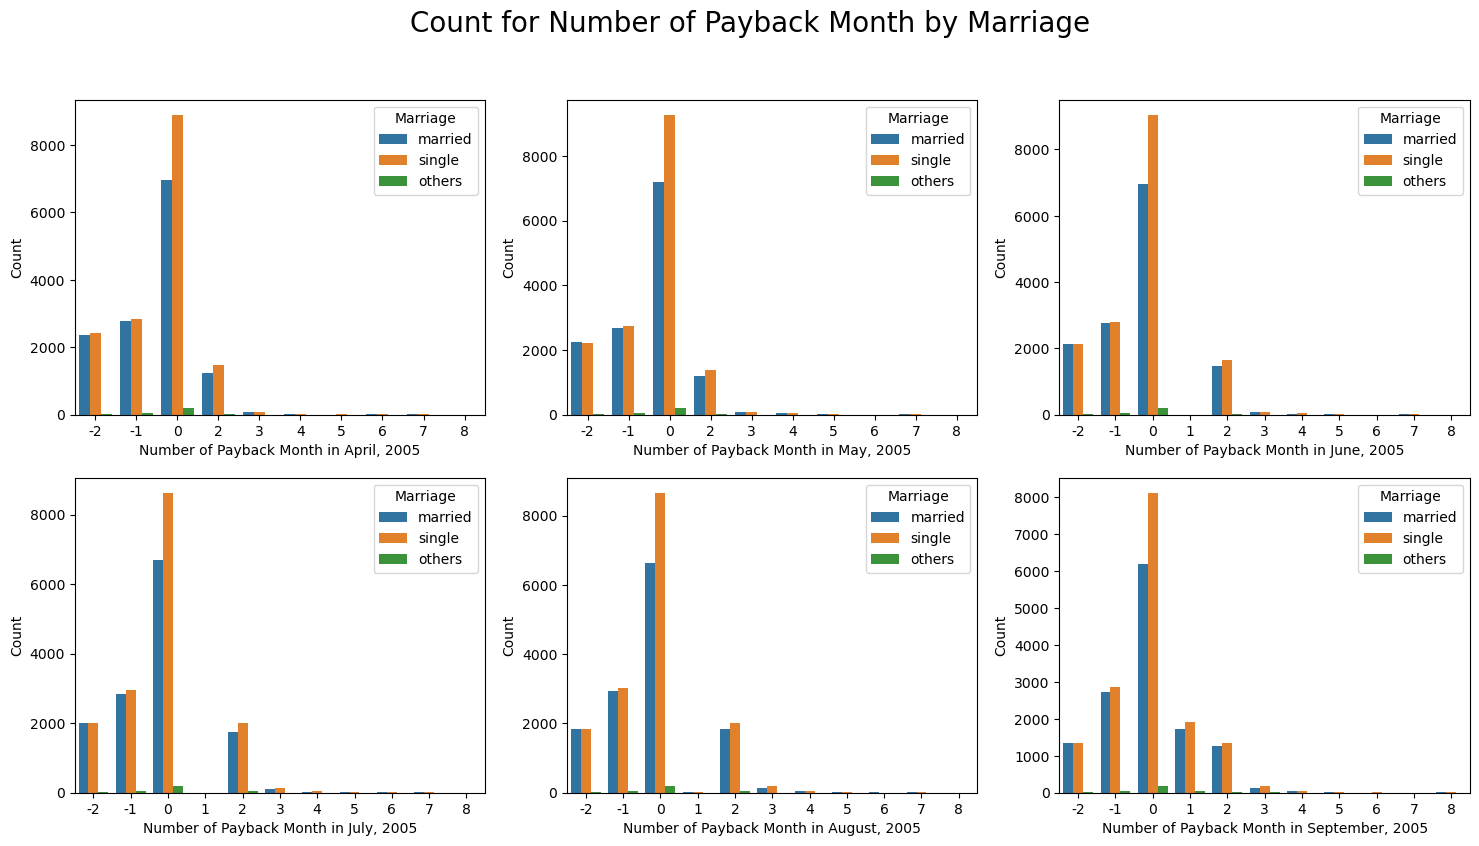

In [31]:
fig2=plt.figure(figsize=(18,9))
fig2.suptitle("Count for Number of Payback Month by Marriage", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='Repayment_Status_April,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Count')
plt.subplot(2,3,2)
sns.countplot(x='Repayment_Status_May,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Count')
plt.subplot(2,3,3)
sns.countplot(x='Repayment_Status_June,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Count')
plt.subplot(2,3,4)
sns.countplot(x='Repayment_Status_July,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Count')
plt.subplot(2,3,5)
sns.countplot(x='Repayment_Status_August,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Count')
plt.subplot(2,3,6)
sns.countplot(x='Repayment_Status_September,2005',hue='Marriage',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Count')
plt.show()

- This set of count plots shows the count of sample clients based on their marital statuses for how many months they used to pay back their credit cards.
- The pattern for repayment status divided by marital status looks similar from April to September in 2005. Sample clients in all three marital status's number of payback months centralize around 0, and no distinct difference between this group of plots are being observed.  

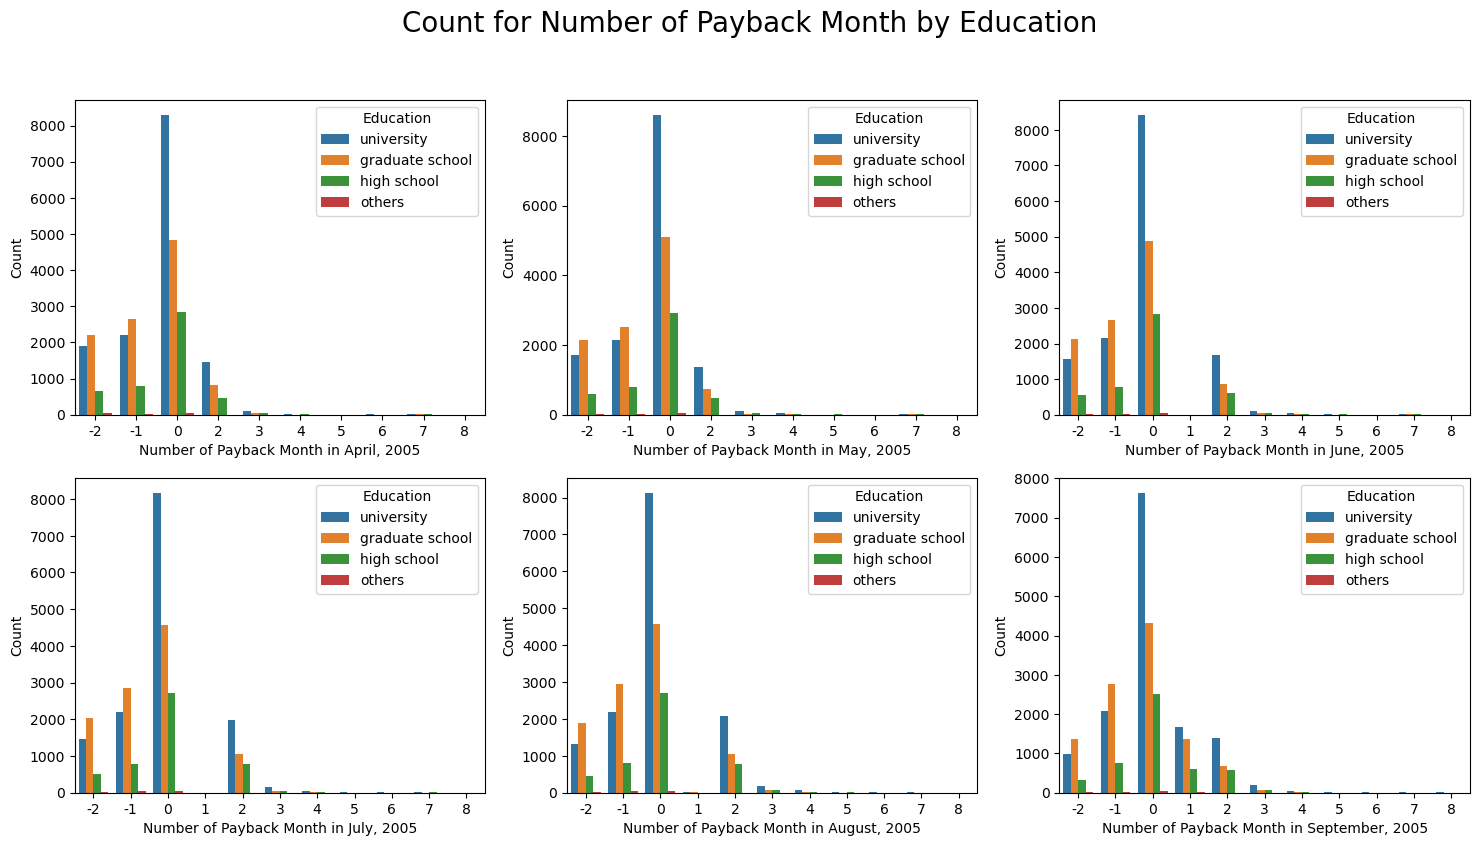

In [32]:
fig3=plt.figure(figsize=(18,9))
fig3.suptitle("Count for Number of Payback Month by Education", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='Repayment_Status_April,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Count')
plt.subplot(2,3,2)
sns.countplot(x='Repayment_Status_May,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Count')
plt.subplot(2,3,3)
sns.countplot(x='Repayment_Status_June,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Count')
plt.subplot(2,3,4)
sns.countplot(x='Repayment_Status_July,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Count')
plt.subplot(2,3,5)
sns.countplot(x='Repayment_Status_August,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Count')
plt.subplot(2,3,6)
sns.countplot(x='Repayment_Status_September,2005',hue='Education',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Count')
plt.show()

- This set of count plots shows the count of sample clients based on their education levels for how many months they used to pay back their credit cards.
- The pattern for repayment status divided by education level looks similar through April to September in 2005 and mainly concentrates on the range of pay duly to delay for two months. The trend for this group of plots is identical to the two previous groups(sex and marital status).

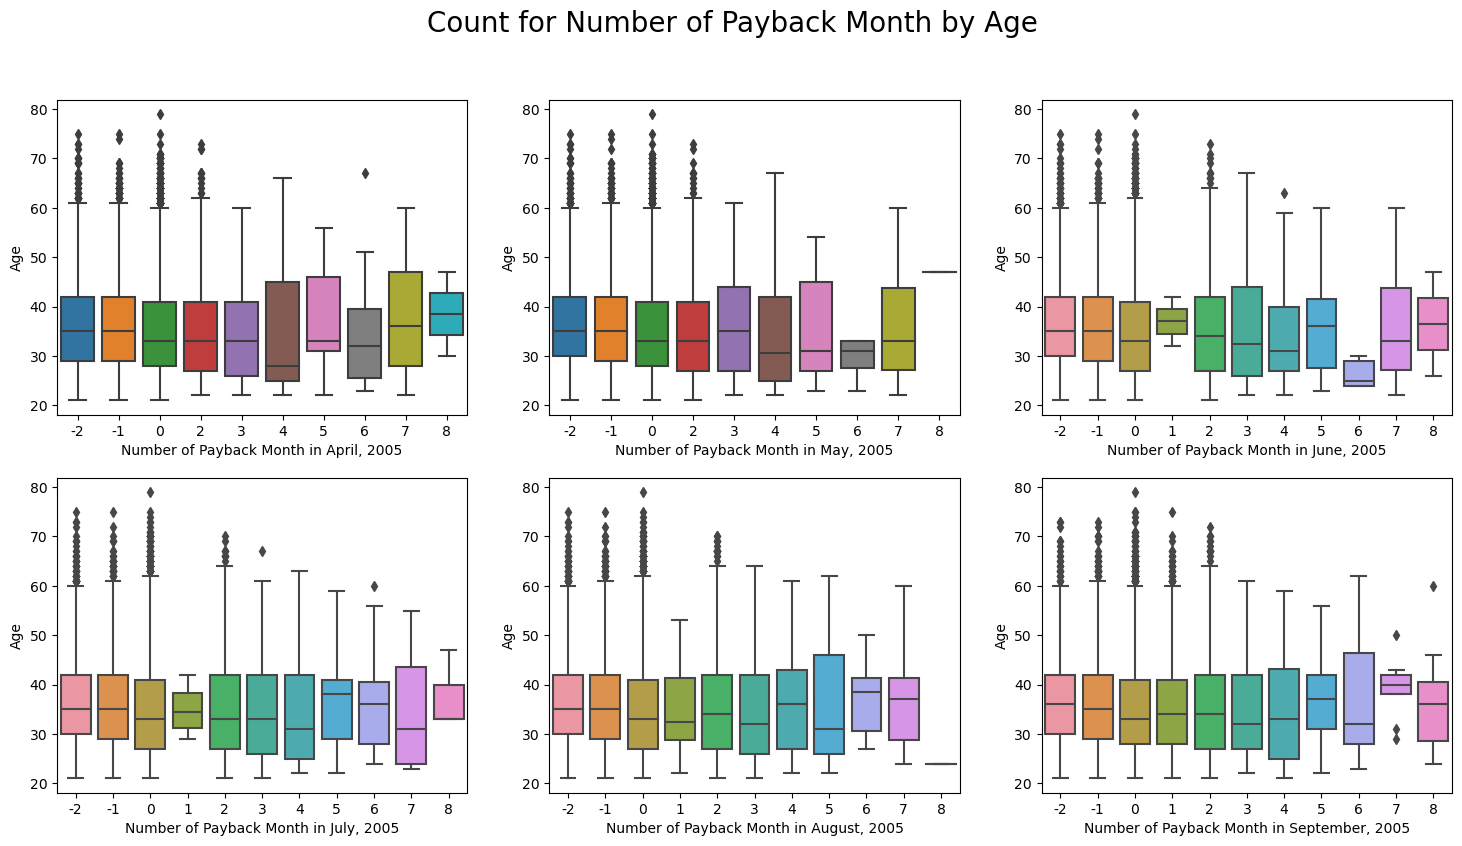

In [33]:
fig4=plt.figure(figsize=(18,9))
fig4.suptitle("Count for Number of Payback Month by Age", fontsize=20)
plt.subplot(2,3,1)
sns.boxplot(x='Repayment_Status_April,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in April, 2005',ylabel='Age')
plt.subplot(2,3,2)
sns.boxplot(x='Repayment_Status_May,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in May, 2005',ylabel='Age')
plt.subplot(2,3,3)
sns.boxplot(x='Repayment_Status_June,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in June, 2005',ylabel='Age')
plt.subplot(2,3,4)
sns.boxplot(x='Repayment_Status_July,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in July, 2005',ylabel='Age')
plt.subplot(2,3,5)
sns.boxplot(x='Repayment_Status_August,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in August, 2005',ylabel='Age')
plt.subplot(2,3,6)
sns.boxplot(x='Repayment_Status_September,2005',y='Age',data=df9).set(xlabel='Number of Payback Month in September, 2005',ylabel='Age')
plt.show()

- This set of box plots shows the count, median, lower and upper quartiles of sample clients by their age for how many months they used to pay back their credit cards.
- There is no obvious pattern indicated in this group of plots. 

### Analysis Pipeline

1. Load Data 
-  Import pandas package.
-  Use pandas package to load data set.
-  Skip the duplicate index column.

In [3]:
import pandas as pd
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop("Unnamed: 0",axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


2. Clean Data
- Remove "Unnamed: 0", "X1", "X12", "X13", "X14", "X15", "X16", "X17", "X18", "X19", "X20", "X21", "X22", "X23", "Y" column which is not being used and stored into a new data frame.
- Remove rows with unusual values in the new data frame such as "0", "5", and "6" in the "X3" column and "0" in the "X4" column.
- Remove rows with NaN value in the new data frame. 

In [4]:
df2=df.drop(['Unnamed: 0','X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
df3=(df2
    .loc[lambda x: x['X4']!=0]
    .loc[lambda x: x['X3']!=0]
    .loc[lambda x: x['X3']!=5]
    .loc[lambda x: x['X3']!=6]
    .reset_index(drop=True)
    )
df4=df3.dropna(axis=0)
df4

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,26,-1,2,0,0,0,2
3,2,2,2,34,0,0,0,0,0,0
4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29597,1,3,1,39,0,0,0,0,0,0
29598,1,3,2,43,-1,-1,-1,-1,0,0
29599,1,2,2,37,4,3,2,-1,0,0
29600,1,3,1,41,1,-1,0,0,0,-1


3. Process Data
- Rename the index row into more understandable names and remove the first row which is with duplicate names. 
- Calculate the average of payback months (the mean of "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6") for each row and create a new column called "Average_Repayment_Status".
- Change the order of "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" column based on the month.  
- Rename the "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6" column to more representative names. 
- Replace the numeric values in the "Sex", "Education", and "Marriage" column with values that are more representative. 

In [5]:
df5=df4.rename({'X2':'Sex','X3':'Education','X4':'Marriage','X5':'Age','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
df6=df5.iloc[1:].reset_index(drop=True)
df6["Average_Repayment_Status"]=df6[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
df7=df6.rename({'PAY_0':'Repayment_Status_September,2005','PAY_2':'Repayment_Status_August,2005','PAY_3':'Repayment_Status_July,2005','PAY_4':'Repayment_Status_June,2005','PAY_5':'Repayment_Status_May,2005','PAY_6':'Repayment_Status_April,2005'},axis='columns')
df8=df7[['Sex', 'Education', 'Marriage', 'Age','Repayment_Status_April,2005','Repayment_Status_May,2005','Repayment_Status_June,2005','Repayment_Status_July,2005','Repayment_Status_August,2005','Repayment_Status_September,2005','Average_Repayment_Status']]
df8['Sex']=df8['Sex'].replace([1,2],['male','female'])
df8['Education']=df8['Education'].replace([1,2,3,4],['graduate school','university', 'high school','others'])
df8['Marriage']=df8['Marriage'].replace([1,2,3],['married','single','others'])
df9=df8
df9

,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


4. Wrangle Data
- Group data for each categorical column with each month's repayment status column and make the count of grouped data into a data frame (inside the function that make visualization).
- Group data for the "Age" column and "Average_Repayment_Status" column and make the count of grouped data into a data frame (inside the function that make visualization). 
- "Contate" function will also be used later in making visualization to add missing rows. 


#### Method Chaining and Writing Python programs

In [6]:
import sys
sys.path.append('./code')

In [7]:
import code

In [8]:
import project_functions_Remy as pf
df = pf.load_and_process('../data/raw/default of credit card clients.xls')
df

,Sex,Education,Marriage,Age,"Repayment_Status_April,2005","Repayment_Status_May,2005","Repayment_Status_June,2005","Repayment_Status_July,2005","Repayment_Status_August,2005","Repayment_Status_September,2005",Average_Repayment_Status
0,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,female,university,single,26,2,0,0,0,2,-1,0.500000
2,female,university,single,34,0,0,0,0,0,0,0.000000
3,female,university,married,37,0,0,0,0,0,0,0.000000
4,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
29596,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


### Task 3

In [9]:
def pdf1():
    
    '''
    This function grouped the sex and repayment status column for April, 2005 and saved the grouped data count into a new data frame. 
    Then slice the data frame by gender and add missing values. 
    Use these two data frames to calculate the proportion of each gender and use that results to add a new "Percentage" column.
    This function returns a data frame containing the count and percentage of each sex and their number of payback months.
    
    '''
    
    dfp1=df9.groupby(['Sex','Repayment_Status_April,2005']).size().to_frame().reset_index()
    femaledf=dfp1.loc[dfp1['Sex']=='female']
    new_row= {'Sex':'female', 'Repayment_Status_April,2005':8, 0:0}
    new_df= pd.DataFrame([new_row])
    new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
    maledf=dfp1.loc[dfp1['Sex']=='male']
    totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
    femalePercentage = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
    malePercentage = [i / j * 100 for i,j in zip(maledf[0], totals)]
    p1df=pd.concat([new_femaledf,maledf]).reset_index(drop=True)
    p1df['Percentage'] =femalePercentage+malePercentage
    p1df=p1df.rename(columns={0:"Count"})
    p1df.to_csv("../data/processed/processed_data_Remy/plot1_data.csv")
    return p1df

In [10]:
def pdf2():
    
    '''
    This function grouped the sex and repayment status column for May, 2005 and saved the grouped data count into a new data frame. 
    Then slice the data frame by gender and add missing values. 
    Use these two data frames to calculate the proportion of each gender and use that results to add a new "Percentage" column.
    This function returns a data frame containing the count and percentage of each sex and their number of payback months.
    
    '''
    
    dfp2=df9.groupby(['Sex','Repayment_Status_May,2005']).size().to_frame().reset_index()
    dfp2=dfp2.sort_index().reset_index(drop=True)
    femaledf=dfp2.loc[dfp2['Sex']=='female']
    new_row= {'Sex':'female', 'Repayment_Status_May,2005':8, 0:0}
    new_row2={'Sex':'female', 'Repayment_Status_May,2005':6, 0:0}
    new_df2= pd.DataFrame([new_row2])
    new_df= pd.DataFrame([new_row])
    new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
    new_femaledf=pd.concat([new_femaledf.iloc[0:7],new_df2, new_femaledf.iloc[7:11]]).reset_index(drop=True)
    maledf=dfp2.loc[dfp2['Sex']=='male']
    totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
    femalePercentage= [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
    malePercentage = [i / j * 100 for i,j in zip(maledf[0], totals)]
    p2df=pd.concat([new_femaledf,maledf]).reset_index(drop=True)
    p2df['Percentage'] =femalePercentage+malePercentage
    p2df=p2df.rename(columns={0:"Count"})
    p2df.to_csv("../data/processed/processed_data_Remy/plot2_data.csv")
    return p2df
    

In [11]:
def pdf3():
    
    '''
    This function grouped the sex and repayment status column for June, 2005 and saved the grouped data count into a new data frame. 
    Then slice the data frame by gender and add missing values. 
    Use these two data frames to calculate the proportion of each gender and use that results to add a new "Percentage" column.
    This function returns a data frame containing the count and percentage of each sex and their number of payback months.
    
    '''
    
    dfp3=df9.groupby(['Sex','Repayment_Status_June,2005']).size().to_frame().reset_index()
    dfp3=dfp3.sort_index().reset_index(drop=True)
    femaledf=dfp3.loc[dfp3['Sex']=='female']
    new_row= {'Sex':'female', 'Repayment_Status_June,2005':8, 0:0}
    new_row2={'Sex':'female', 'Repayment_Status_June,2005':1, 0:0}
    new_df2= pd.DataFrame([new_row2])
    new_df= pd.DataFrame([new_row])
    new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
    new_femaledf=pd.concat([new_femaledf.iloc[0:3],new_df2, new_femaledf.iloc[3:11]]).reset_index(drop=True)
    maledf=dfp3.loc[dfp3['Sex']=='male']
    totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
    femalePercentage = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
    malePercentage = [i / j * 100 for i,j in zip(maledf[0], totals)]
    p3df=pd.concat([new_femaledf,maledf]).reset_index(drop=True)
    p3df['Percentage'] =femalePercentage+malePercentage
    p3df=p3df.rename(columns={0:"Count"})
    p3df.to_csv("../data/processed/processed_data_Remy/plot3_data.csv")
    return p3df

In [12]:
def pdf4():
    
    '''
    This function grouped the sex and repayment status column for July, 2005 and saved the grouped data count into a new data frame. 
    Then slice the data frame by gender and add missing values. 
    Use these two data frames to calculate the proportion of each gender and use that results to add a new "Percentage" column.
    This function returns a data frame containing the count and percentage of each sex and their number of payback months.
    
    '''
    
    dfp4=df9.groupby(['Sex','Repayment_Status_July,2005']).size().to_frame().reset_index()
    dfp4=dfp4.sort_index().reset_index(drop=True)
    femaledf=dfp4.loc[dfp4['Sex']=='female']
    new_row= {'Sex':'female', 'Repayment_Status_July,2005':8, 0:0}
    new_row2={'Sex':'female', 'Repayment_Status_July,2005':1, 0:0}
    new_df2= pd.DataFrame([new_row2])
    new_df= pd.DataFrame([new_row])
    new_femaledf=pd.concat([femaledf,new_df],axis=0,ignore_index=True)
    new_femaledf=pd.concat([new_femaledf.iloc[0:3],new_df2, new_femaledf.iloc[3:11]]).reset_index(drop=True)
    maledf=dfp4.loc[dfp4['Sex']=='male']
    totals = [i+j for i,j in zip(new_femaledf[0],maledf[0])]
    femalePercentage = [i / j * 100 for i,j in zip(new_femaledf[0], totals)]
    malePercentage = [i / j * 100 for i,j in zip(maledf[0], totals)]
    p4df=pd.concat([new_femaledf,maledf]).reset_index(drop=True)
    p4df['Percentage'] =femalePercentage+malePercentage
    p4df=p4df.rename(columns={0:"Count"})
    p4df.to_csv("../data/processed/processed_data_Remy/plot4_data.csv")
    return p4df

In [13]:
def pdf5():
    
    '''
    This function grouped the sex and repayment status column for August, 2005 and saved the grouped data count into a new data frame. 
    Then slice the data frame by gender and add missing values. 
    Use these two data frames to calculate the proportion of each gender and use that results to add a new "Percentage" column.
    This function returns a data frame containing the count and percentage of each sex and their number of payback months.
    
    '''
    
    dfp5=df9.groupby(['Sex','Repayment_Status_August,2005']).size().to_frame().reset_index()
    femaledf=dfp5.loc[dfp5['Sex']=='female']
    maledf=dfp5.loc[dfp5['Sex']=='male']
    new_row= {'Sex':'male', 'Repayment_Status_August,2005':8, 0:0}
    new_df= pd.DataFrame([new_row])
    new_maledf=pd.concat([maledf,new_df],axis=0,ignore_index=True)
    totals = [i+j for i,j in zip(femaledf[0],new_maledf[0])]
    femalePercentage = [i / j * 100 for i,j in zip(femaledf[0], totals)]
    malePercentage = [i / j * 100 for i,j in zip(new_maledf[0], totals)]
    p5df=pd.concat([femaledf,new_maledf]).reset_index(drop=True)
    p5df['Percentage'] =femalePercentage+malePercentage
    p5df=p5df.rename(columns={0:"Count"})
    p5df.to_csv("../data/processed/processed_data_Remy/plot5_data.csv")
    return p5df

In [14]:
def pdf6():
    
    '''
    This function grouped the sex and repayment status column for September, 2005 and saved the grouped data count into a new data frame. 
    Then slice the data frame by gender.
    Use these two data frames to calculate the proportion of each gender and use that results to add a new "Percentage" column.
    This function returns a data frame containing the count and percentage of each sex and their number of payback months.
    
    '''
    dfp6=df9.groupby(['Sex','Repayment_Status_September,2005']).size().to_frame().reset_index()
    femaledf=dfp6.loc[dfp6['Sex']=='female']
    maledf=dfp6.loc[dfp6['Sex']=='male']
    totals = [i+j for i,j in zip(femaledf[0],maledf[0])]
    femalePercentage = [i / j * 100 for i,j in zip(femaledf[0], totals)]
    malePercentage = [i / j * 100 for i,j in zip(maledf[0], totals)]
    p6df=pd.concat([femaledf,maledf]).reset_index(drop=True)
    p6df['Percentage'] =femalePercentage+malePercentage
    p6df=p6df.rename(columns={0:"Count"})
    p6df.to_csv("../data/processed/processed_data_Remy/plot6_data.csv")
    return p6df
        

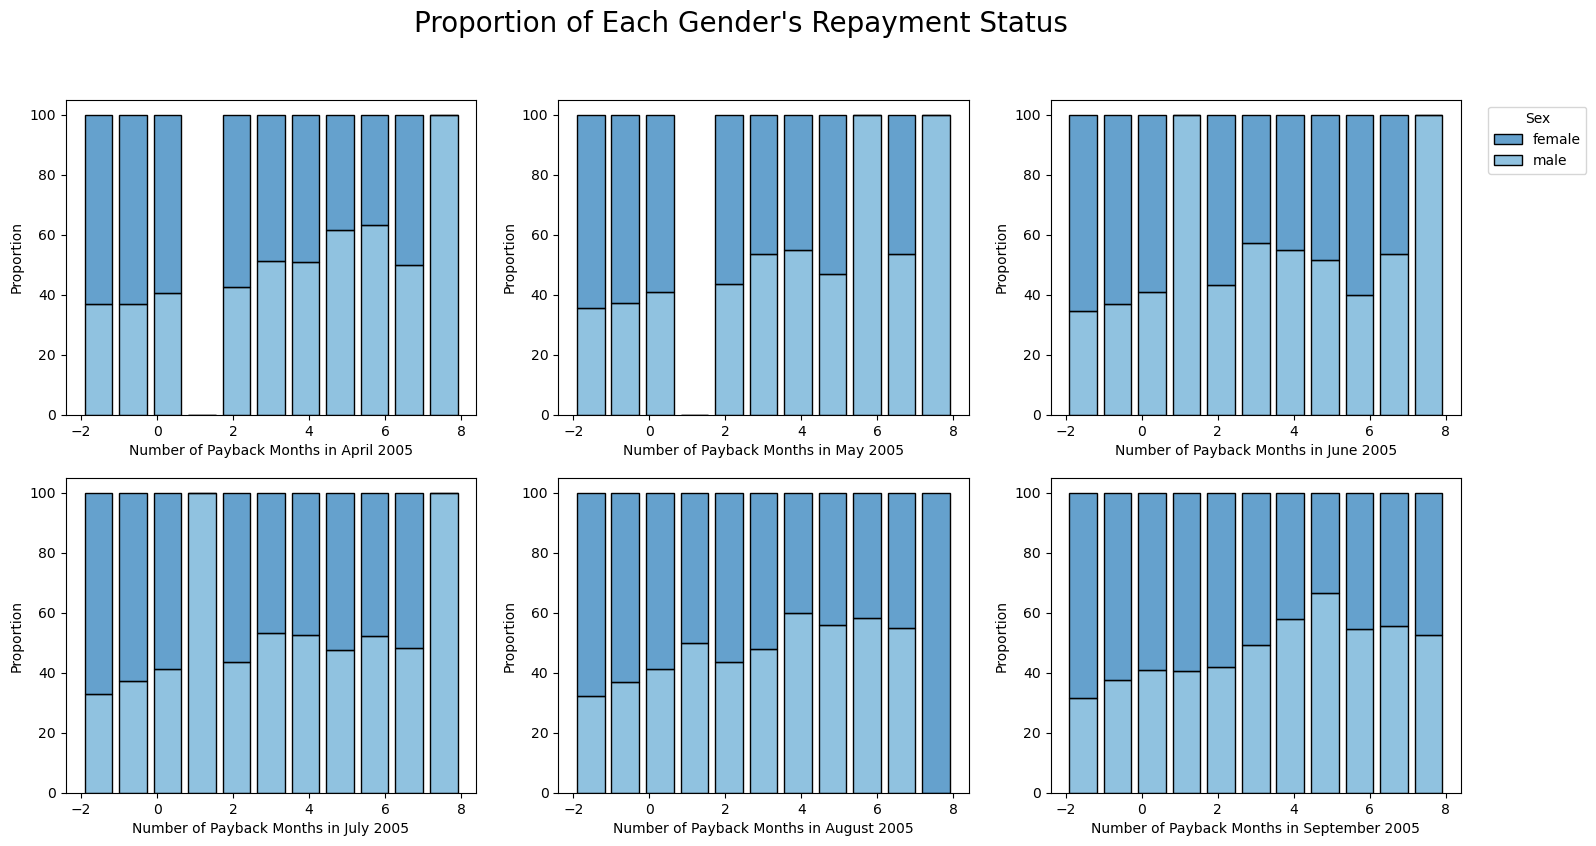

In [28]:
# Create grouped stacked bar charts for showing the percentage of each gender's repayment status in each month.

fig=plt.figure(figsize=(18,9))
fig.suptitle("Proportion of Each Gender's Repayment Status", fontsize=20)
plt.subplot(2,3,1)
ax = sns.histplot(pdf1(), x='Repayment_Status_April,2005', hue='Sex', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax.set_ylabel('Proportion')
ax.set_xlabel('Number of Payback Months in April 2005')
ax.get_legend().remove()
plt.subplot(2,3,2)
ax2 = sns.histplot(pdf2(), x='Repayment_Status_May,2005', hue='Sex', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax2.set_ylabel('Proportion')
ax2.set_xlabel('Number of Payback Months in May 2005')
ax2.get_legend().remove()
plt.subplot(2,3,3)

ax3 = sns.histplot(pdf3(), x='Repayment_Status_June,2005', hue='Sex', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax3.set_ylabel('Proportion')
ax3.set_xlabel('Number of Payback Months in June 2005')
legend = ax3.get_legend().set_bbox_to_anchor((1.05, 1))
plt.subplot(2,3,4)
ax4 = sns.histplot(pdf4(), x='Repayment_Status_July,2005', hue='Sex', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax4.set_ylabel('Proportion')
ax4.set_xlabel('Number of Payback Months in July 2005')
ax4.get_legend().remove()
plt.subplot(2,3,5)
ax5 = sns.histplot(pdf5(), x='Repayment_Status_August,2005', hue='Sex', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax5.set_ylabel('Proportion')
ax5.set_xlabel('Number of Payback Months in August 2005')
ax5.get_legend().remove()
plt.subplot(2,3,6)
ax6 = sns.histplot(pdf6(), x='Repayment_Status_September,2005', hue='Sex', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax6.set_ylabel('Proportion')
ax6.set_xlabel('Number of Payback Months in September 2005')
ax6.get_legend().remove()
plt.show()

#### Fig. 1
- The measurement scale for the repayment status (x-axis "Number of Payback Month" in this set of plots) is "-1" means pay duly, "1" means payment delay for one month, "2" means payment delay for two months, and so on. 
- The plot in the set displays the difference between the relative distribution of male and female clients divided by the sum of sample clients in each delay period from April to September 2005, so we can track the trend indicated by the changing contribution of gender. 
- From these plots, female samples took a large proportion on the scale -2 to 0 which means female clients may like to pay their bill in advance like early one month or pay on time. In the range of delaying for three months and above, male samples mostly have larger or equal percentages than females.   
- For my research question, I am interested in which gender influences the length of repayment the most. The visualization  demonstrates male clients can have more influence on the length of payment delay because they didn't tend to pay before the due month and the ratio of being pay delayed three months and above is larger.   

In [15]:
def pdf7():  
    
        '''
        This function grouped the education and repayment status column for April, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by education levels and add missing values. 
        Use these four data frames to calculate the proportion of each education level and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each education level and their number of payback months.

        '''

        dfp7=df9.groupby(['Education','Repayment_Status_April,2005']).size().to_frame().reset_index()
        dfp7=dfp7.sort_index().reset_index(drop=True)    
        gsdf=dfp7.loc[dfp7['Education']=='graduate school']
        hsdf=dfp7.loc[dfp7['Education']=='high school']
        odf=dfp7.loc[dfp7['Education']=='others']
        udf=dfp7.loc[dfp7['Education']=='university']
        new_row= pd.DataFrame([{'Education':'high school', 'Repayment_Status_April,2005':8, 0:0}])
        new_hsdf=pd.concat([hsdf,new_row],axis=0,ignore_index=True) 
        new_row2=pd.DataFrame([{'Education':'others', 'Repayment_Status_April,2005':3, 0:0}])
        new_row3=pd.DataFrame([{'Education':'others', 'Repayment_Status_April,2005':4, 0:0}])
        new_row4=pd.DataFrame([{'Education':'others', 'Repayment_Status_April,2005':5, 0:0}])
        new_row5=pd.DataFrame([{'Education':'others', 'Repayment_Status_April,2005':6, 0:0}])
        new_row6=pd.DataFrame([{'Education':'others', 'Repayment_Status_April,2005':7, 0:0}])
        new_row7=pd.DataFrame([{'Education':'others', 'Repayment_Status_April,2005':8, 0:0}])
        new_odf=pd.concat([odf.iloc[0:4],new_row2, odf.iloc[4:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:5],new_row3, new_odf.iloc[5:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:6],new_row4, new_odf2.iloc[6:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3.iloc[0:7],new_row5, new_odf3.iloc[7:]]).reset_index(drop=True)
        new_odf5=pd.concat([new_odf4.iloc[0:8],new_row6, new_odf4.iloc[8:]]).reset_index(drop=True)
        new_odf6=pd.concat([new_odf5.iloc[0:9],new_row7, new_odf5.iloc[9:]]).reset_index(drop=True)
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],new_hsdf[0],new_odf6[0],udf[0])]
        hsPercentage = [i / j * 100 for i,j in zip(new_hsdf[0], totals)]
        uPercentage = [i / j * 100 for i,j in zip(udf[0], totals)]
        gsPercentage = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf6[0], totals)]
        p7df=pd.concat([gsdf,new_hsdf,new_odf6,udf]).reset_index(drop=True)
        p7df['Percentage'] =gsPercentage+hsPercentage+oPercentage+uPercentage
        p7df=p7df.rename(columns={0:"Count"}) 
        p7df.to_csv("../data/processed/processed_data_Remy/plot7_data.csv")
        return p7df

In [16]:
def pdf8(): 
    
        '''
        This function grouped the education and repayment status column for May, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by education levels and add missing values. 
        Use these four data frames to calculate the proportion of each education level and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each education level and their number of payback months.

        '''
        dfp8=df9.groupby(['Education','Repayment_Status_May,2005']).size().to_frame().reset_index()
        dfp8=dfp8.sort_index().reset_index(drop=True)  
        gsdf=dfp8.loc[dfp8['Education']=='graduate school']
        hsdf=dfp8.loc[dfp8['Education']=='high school']
        odf=dfp8.loc[dfp8['Education']=='others']
        udf=dfp8.loc[dfp8['Education']=='university']
        new_row= pd.DataFrame([{'Education':'high school', 'Repayment_Status_May,2005':8, 0:0}])
        new_row2=pd.DataFrame([{'Education':'others', 'Repayment_Status_May,2005':3, 0:0}])
        new_row3=pd.DataFrame([{'Education':'others', 'Repayment_Status_May,2005':4, 0:0}])
        new_row4=pd.DataFrame([{'Education':'others', 'Repayment_Status_May,2005':5, 0:0}])
        new_row5=pd.DataFrame([{'Education':'others', 'Repayment_Status_May,2005':6, 0:0}])
        new_row6=pd.DataFrame([{'Education':'others', 'Repayment_Status_May,2005':7, 0:0}])
        new_row7=pd.DataFrame([{'Education':'others', 'Repayment_Status_May,2005':8, 0:0}])
        new_row8= pd.DataFrame([{'Education':'graduate school', 'Repayment_Status_May,2005':6, 0:0}])
        new_row9= pd.DataFrame([{'Education':'university', 'Repayment_Status_May,2005':8, 0:0}])
        new_hsdf=pd.concat([hsdf,new_row],axis=0,ignore_index=True) 
        new_odf=pd.concat([odf.iloc[0:4],new_row2, odf.iloc[4:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:5],new_row3, new_odf.iloc[5:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:6],new_row4, new_odf2.iloc[6:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3.iloc[0:7],new_row5, new_odf3.iloc[7:]]).reset_index(drop=True)
        new_odf5=pd.concat([new_odf4.iloc[0:8],new_row6, new_odf4.iloc[8:]]).reset_index(drop=True)
        new_odf6=pd.concat([new_odf5.iloc[0:9],new_row7, new_odf5.iloc[9:]]).reset_index(drop=True)
        new_gsdf=pd.concat([gsdf.iloc[0:7],new_row8, gsdf.iloc[7:]]).reset_index(drop=True)
        new_udf=pd.concat([udf,new_row9],axis=0,ignore_index=True) 
        totals = [i+j+m+n for i,j,m,n in zip(new_gsdf[0],new_hsdf[0],new_odf6[0],new_udf[0])]
        hsPercentage = [i / j * 100 for i,j in zip(new_hsdf[0], totals)]
        uPercentage = [i / j * 100 for i,j in zip(new_udf[0], totals)]
        gsPercentage = [i / j * 100 for i,j in zip(new_gsdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf6[0], totals)]
        p8df=pd.concat([new_gsdf,new_hsdf,new_odf6,new_udf]).reset_index(drop=True)
        p8df['Percentage'] =gsPercentage+hsPercentage+oPercentage+uPercentage
        p8df=p8df.rename(columns={0:"Count"}) 
        p8df.to_csv("../data/processed/processed_data_Remy/plot8_data.csv")
        return p8df   

In [17]:
def pdf9():
        
        '''
        This function grouped the education and repayment status column for June, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by education levels and add missing values. 
        Use these four data frames to calculate the proportion of each education level and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each education level and their number of payback months.

        '''
        
        dfp9=df9.groupby(['Education','Repayment_Status_June,2005']).size().to_frame().reset_index()
        dfp9=dfp9.sort_index().reset_index(drop=True)  
        gsdf=dfp9.loc[dfp9['Education']=='graduate school']
        hsdf=dfp9.loc[dfp9['Education']=='high school']
        odf=dfp9.loc[dfp9['Education']=='others']
        udf=dfp9.loc[dfp9['Education']=='university']
        new_row= pd.DataFrame([{'Education':'high school', 'Repayment_Status_June,2005':8, 0:0}])
        new_row2=pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':3, 0:0}])
        new_row3=pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':4, 0:0}])
        new_row4=pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':5, 0:0}])
        new_row5=pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':6, 0:0}])
        new_row6=pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':7, 0:0}])
        new_row7=pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':8, 0:0}])
        new_row8= pd.DataFrame([{'Education':'others', 'Repayment_Status_June,2005':1, 0:0}])
        new_row9= pd.DataFrame([{'Education':'high school', 'Repayment_Status_June,2005':1, 0:0}])
        new_row10= pd.DataFrame([{'Education':'university', 'Repayment_Status_June,2005':1, 0:0}])
        new_hsdf=pd.concat([hsdf.iloc[0:3],new_row9, hsdf.iloc[3:]]).reset_index(drop=True)
        new_hsdf1=pd.concat([new_hsdf,new_row],axis=0,ignore_index=True) 
        new_odf=pd.concat([odf.iloc[0:4],new_row2, odf.iloc[4:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:5],new_row3, new_odf.iloc[5:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:6],new_row4, new_odf2.iloc[6:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3.iloc[0:7],new_row5, new_odf3.iloc[7:]]).reset_index(drop=True)
        new_odf5=pd.concat([new_odf4.iloc[0:8],new_row6, new_odf4.iloc[8:]]).reset_index(drop=True)
        new_odf6=pd.concat([new_odf5.iloc[0:9],new_row7, new_odf5.iloc[9:]]).reset_index(drop=True)
        new_odf7=pd.concat([new_odf6.iloc[0:3],new_row8, new_odf6.iloc[3:]]).reset_index(drop=True)
        new_udf=pd.concat([udf.iloc[0:3],new_row10,udf.iloc[3:]]).reset_index(drop=True)
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],new_hsdf1[0],new_odf7[0],new_udf[0])]
        hsPercentage = [i / j * 100 for i,j in zip(new_hsdf1[0], totals)]
        uPercentage = [i / j * 100 for i,j in zip(new_udf[0], totals)]
        gsPercentage = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf7[0], totals)]
        p9df=pd.concat([gsdf,new_hsdf1,new_odf7,new_udf]).reset_index(drop=True)
        p9df['Percentage'] =gsPercentage+hsPercentage+oPercentage+uPercentage
        p9df=p9df.rename(columns={0:"Count"}) 
        p9df.to_csv("../data/processed/processed_data_Remy/plot9_data.csv")
        return p9df 

In [18]:
def pdf10():
        '''
        This function grouped the education and repayment status column for July, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by education levels and add missing values. 
        Use these four data frames to calculate the proportion of each education level and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each education level and their number of payback months.

        '''
    
        dfp10=df9.groupby(['Education','Repayment_Status_July,2005']).size().to_frame().reset_index()
        dfp10=dfp10.sort_index().reset_index(drop=True)  
        gsdf=dfp10.loc[dfp10['Education']=='graduate school']
        hsdf=dfp10.loc[dfp10['Education']=='high school']
        odf=dfp10.loc[dfp10['Education']=='others']
        udf=dfp10.loc[dfp10['Education']=='university']
        new_row= pd.DataFrame([{'Education':'high school', 'Repayment_Status_July,2005':8, 0:0}])
        new_row2=pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':3, 0:0}])
        new_row3=pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':4, 0:0}])
        new_row4=pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':5, 0:0}])
        new_row5=pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':6, 0:0}])
        new_row6=pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':7, 0:0}])
        new_row7=pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':8, 0:0}])
        new_row8= pd.DataFrame([{'Education':'others', 'Repayment_Status_July,2005':1, 0:0}])
        new_row9= pd.DataFrame([{'Education':'high school', 'Repayment_Status_July,2005':1, 0:0}])
        new_hsdf=pd.concat([hsdf.iloc[0:3],new_row9, hsdf.iloc[3:]]).reset_index(drop=True)
        new_hsdf1=pd.concat([new_hsdf,new_row],axis=0,ignore_index=True) 
        new_odf=pd.concat([odf.iloc[0:4],new_row2, odf.iloc[4:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:5],new_row3, new_odf.iloc[5:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:6],new_row4, new_odf2.iloc[6:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3.iloc[0:7],new_row5, new_odf3.iloc[7:]]).reset_index(drop=True)
        new_odf5=pd.concat([new_odf4.iloc[0:8],new_row6, new_odf4.iloc[8:]]).reset_index(drop=True)
        new_odf6=pd.concat([new_odf5.iloc[0:9],new_row7, new_odf5.iloc[9:]]).reset_index(drop=True)
        new_odf7=pd.concat([new_odf6.iloc[0:3],new_row8, new_odf6.iloc[3:]]).reset_index(drop=True)
        totals = [i+j+m+n for i,j,m,n in zip(gsdf[0],new_hsdf1[0],new_odf7[0],udf[0])]
        hsPercentage = [i / j * 100 for i,j in zip(new_hsdf1[0], totals)]
        uPercentage = [i / j * 100 for i,j in zip(udf[0], totals)]
        gsPercentage = [i / j * 100 for i,j in zip(gsdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf7[0], totals)]
        p10df=pd.concat([gsdf,new_hsdf1,new_odf7,udf]).reset_index(drop=True)
        p10df['Percentage'] =gsPercentage+hsPercentage+oPercentage+uPercentage
        p10df=p10df.rename(columns={0:"Count"}) 
        p10df.to_csv("../data/processed/processed_data_Remy/plot10_data.csv")
        return p10df
    

In [19]:
def pdf11():
        '''
        This function grouped the education and repayment status column for August, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by education levels and add missing values. 
        Use these four data frames to calculate the proportion of each education level and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each education level and their number of payback months.

        '''
        dfp11=df9.groupby(['Education','Repayment_Status_August,2005']).size().to_frame().reset_index()
        dfp11=dfp11.sort_index().reset_index(drop=True)  
        gsdf=dfp11.loc[dfp11['Education']=='graduate school']
        hsdf=dfp11.loc[dfp11['Education']=='high school']
        odf=dfp11.loc[dfp11['Education']=='others']
        udf=dfp11.loc[dfp11['Education']=='university']
        new_row= pd.DataFrame([{'Education':'graduate school', 'Repayment_Status_August,2005':8, 0:0}])
        new_row2=pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':3, 0:0}])
        new_row3=pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':4, 0:0}])
        new_row4=pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':5, 0:0}])
        new_row5=pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':6, 0:0}])
        new_row6=pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':7, 0:0}])
        new_row7=pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':8, 0:0}])
        new_row8= pd.DataFrame([{'Education':'others', 'Repayment_Status_August,2005':1, 0:0}])
        new_row9= pd.DataFrame([{'Education':'university', 'Repayment_Status_August,2005':8, 0:0}])
        new_gsdf=pd.concat([gsdf,new_row],axis=0,ignore_index=True) 
        new_odf=pd.concat([odf.iloc[0:4],new_row2, odf.iloc[4:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:5],new_row3, new_odf.iloc[5:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:6],new_row4, new_odf2.iloc[6:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3.iloc[0:7],new_row5, new_odf3.iloc[7:]]).reset_index(drop=True)
        new_odf5=pd.concat([new_odf4.iloc[0:8],new_row6, new_odf4.iloc[8:]]).reset_index(drop=True)
        new_odf6=pd.concat([new_odf5.iloc[0:9],new_row7, new_odf5.iloc[9:]]).reset_index(drop=True)
        new_odf7=pd.concat([new_odf6.iloc[0:3],new_row8, new_odf6.iloc[3:]]).reset_index(drop=True)
        new_udf=pd.concat([udf,new_row9],axis=0,ignore_index=True)
        totals = [i+j+m+n for i,j,m,n in zip(new_gsdf[0],hsdf[0],new_odf7[0],new_udf[0])]
        hsPercentage = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        uPercentage = [i / j * 100 for i,j in zip(new_udf[0], totals)]
        gsPercentage = [i / j * 100 for i,j in zip(new_gsdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf7[0], totals)]
        p11df=pd.concat([new_gsdf,hsdf,new_odf7,new_udf]).reset_index(drop=True)
        p11df['Percentage'] =gsPercentage+hsPercentage+oPercentage+uPercentage
        p11df=p11df.rename(columns={0:"Count"}) 
        p11df.to_csv("../data/processed/processed_data_Remy/plot11_data.csv")
        return p11df
    

In [20]:
def pdf12():
        '''
        This function grouped the education and repayment status column for September, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by education levels and add missing values. 
        Use these four data frames to calculate the proportion of each education level and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each education level and their number of payback months.

        '''
        dfp12=df9.groupby(['Education','Repayment_Status_September,2005']).size().to_frame().reset_index()
        dfp12=dfp12.sort_index().reset_index(drop=True)  
        gsdf=dfp12.loc[dfp12['Education']=='graduate school']
        hsdf=dfp12.loc[dfp12['Education']=='high school']
        odf=dfp12.loc[dfp12['Education']=='others']
        udf=dfp12.loc[dfp12['Education']=='university']
        new_row= pd.DataFrame([{'Education':'graduate school', 'Repayment_Status_September,2005':6, 0:0}])
        new_row2=pd.DataFrame([{'Education':'others', 'Repayment_Status_September,2005':3, 0:0}])
        new_row3=pd.DataFrame([{'Education':'others', 'Repayment_Status_September,2005':4, 0:0}])
        new_row4=pd.DataFrame([{'Education':'others', 'Repayment_Status_September,2005':5, 0:0}])
        new_row5=pd.DataFrame([{'Education':'others', 'Repayment_Status_September,2005':6, 0:0}])
        new_row6=pd.DataFrame([{'Education':'others', 'Repayment_Status_September,2005':7, 0:0}])
        new_row7=pd.DataFrame([{'Education':'others', 'Repayment_Status_September,2005':8, 0:0}])
        new_gsdf=pd.concat([gsdf.iloc[0:8],new_row, gsdf.iloc[8:]]).reset_index(drop=True)
        new_odf=pd.concat([odf.iloc[0:5],new_row2, odf.iloc[5:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:6],new_row3, new_odf.iloc[6:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:7],new_row4, new_odf2.iloc[7:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3.iloc[0:8],new_row5, new_odf3.iloc[8:]]).reset_index(drop=True)
        new_odf5=pd.concat([new_odf4.iloc[0:9],new_row6, new_odf4.iloc[9:]]).reset_index(drop=True)
        new_odf6=pd.concat([new_odf5.iloc[0:10],new_row7, new_odf5.iloc[10:]]).reset_index(drop=True)
        totals = [i+j+m+n for i,j,m,n in zip(new_gsdf[0],hsdf[0],new_odf6[0],udf[0])]
        hsPercentage = [i / j * 100 for i,j in zip(hsdf[0], totals)]
        uPercentage = [i / j * 100 for i,j in zip(udf[0], totals)]
        gsPercentage = [i / j * 100 for i,j in zip(new_gsdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf6[0], totals)]
        p12df=pd.concat([new_gsdf,hsdf,new_odf6,udf]).reset_index(drop=True)
        p12df['Percentage'] =gsPercentage+hsPercentage+oPercentage+uPercentage
        p12df=p12df.rename(columns={0:"Count"})
        p12df.to_csv("../data/processed/processed_data_Remy/plot12_data.csv")
        return p12df

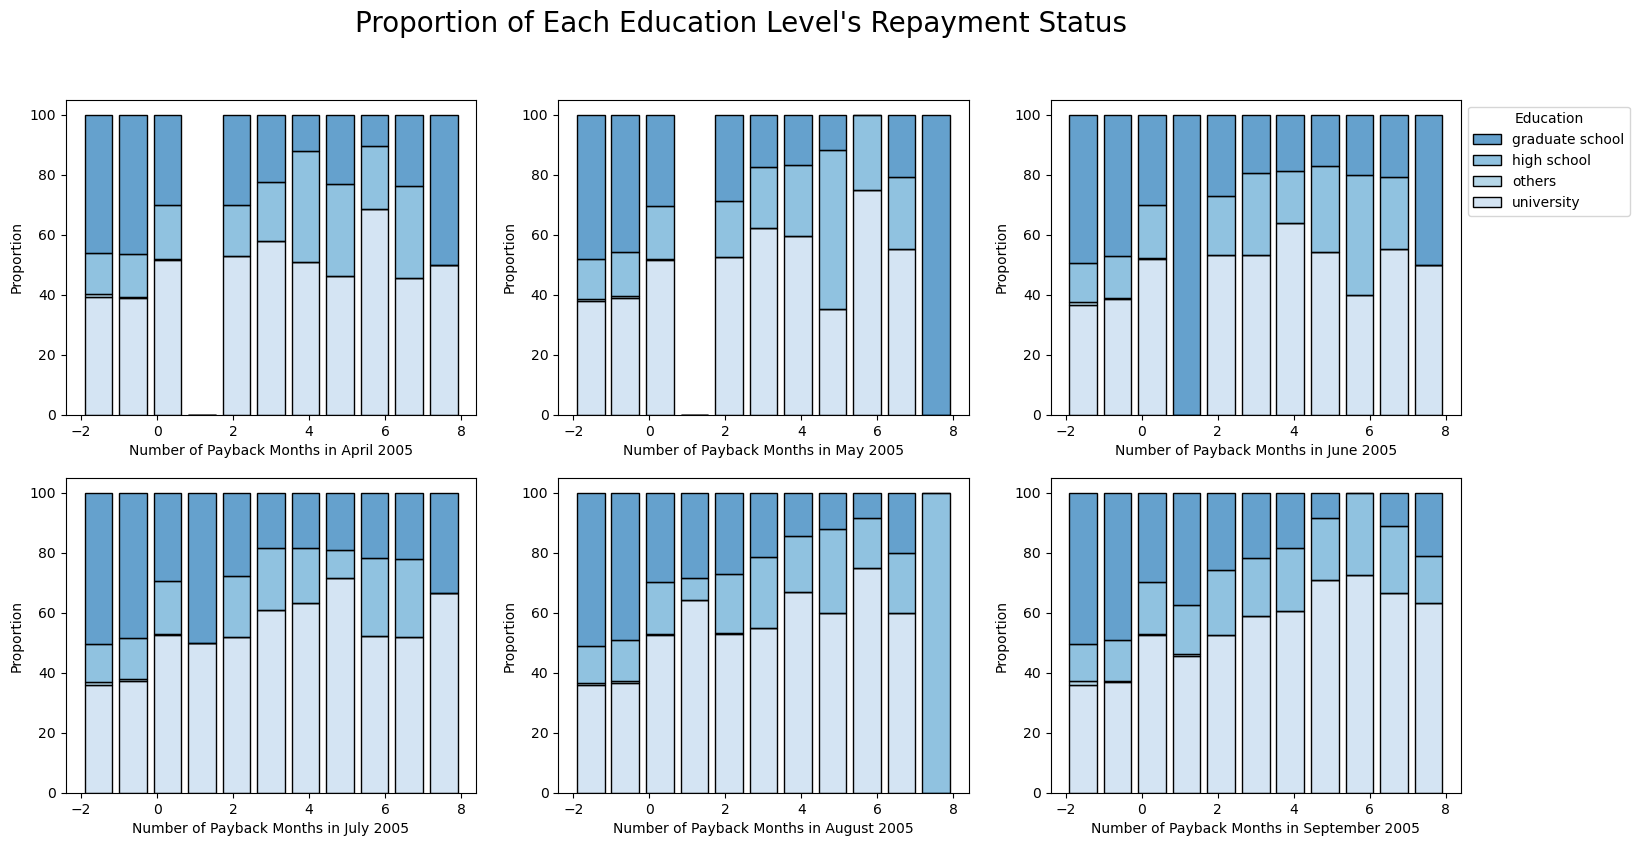

In [29]:
# Create grouped stacked bar charts for showing the percentage of each education level's repayment status in each month. 

fig2=plt.figure(figsize=(18,9))
fig2.suptitle("Proportion of Each Education Level's Repayment Status", fontsize=20)
plt.subplot(2,3,1)
ax7 = sns.histplot(pdf7(), x='Repayment_Status_April,2005', hue='Education', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax7.set_ylabel('Proportion')
ax7.set_xlabel('Number of Payback Months in April 2005')
ax7.get_legend().remove()
plt.subplot(2,3,2)
ax8 = sns.histplot(pdf8(), x='Repayment_Status_May,2005', hue='Education', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax8.set_ylabel('Proportion')
ax8.set_xlabel('Number of Payback Months in May 2005')
ax8.get_legend().remove()

plt.subplot(2,3,3)
ax9 = sns.histplot(pdf9(), x='Repayment_Status_June,2005', hue='Education', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax9.set_ylabel('Proportion')
ax9.set_xlabel('Number of Payback Months in June 2005')
legend = ax9.get_legend().set_bbox_to_anchor((1, 1))
plt.subplot(2,3,4)
ax10 = sns.histplot(pdf10(), x='Repayment_Status_July,2005', hue='Education', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax10.set_ylabel('Proportion')
ax10.set_xlabel('Number of Payback Months in July 2005')
ax10.get_legend().remove()
plt.subplot(2,3,5)
ax11 = sns.histplot(pdf11(), x='Repayment_Status_August,2005', hue='Education', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax11.set_ylabel('Proportion')
ax11.set_xlabel('Number of Payback Months in August 2005')
ax11.get_legend().remove()
plt.subplot(2,3,6)
ax12 = sns.histplot(pdf12(), x='Repayment_Status_September,2005', hue='Education', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax12.set_ylabel('Proportion')
ax12.set_xlabel('Number of Payback Months in September 2005')
ax12.get_legend().remove()
plt.show()

#### Fig. 2
- The measurement scale for the repayment status (x-axis "Number of Payback Month" in this set of plots) is "-1" means pay duly, "1" means payment delay for one month, "2" means payment delay for two months, and so on.
- This set of stacked bar charts shows the percentage of clients using how many months to pay back their credit cards from April to September 2005 based on different education levels.
- From these plots, samples with graduate school backgrounds took a larger proportion in paying bills ahead for one month or paying duly. Samples with university education level took a larger proportion in the scale other than paying earlier for one month and paying on time.
- For my research question, I am interested in how education level affects the length of payment delay. Clients who have a university level of education may have the largest affection on delay payment status among these groups.
 

In [22]:
def pdf13():
        '''
        This function grouped the marriage and repayment status column for April, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by marital statuses and add missing values. 
        Use these four data frames to calculate the proportion of each marital status and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each marital status and their number of payback months.

        '''
    
    
        dfp13=df9.groupby(['Marriage','Repayment_Status_April,2005']).size().to_frame().reset_index()
        dfp13=dfp13.sort_index().reset_index(drop=True)  
        mdf=dfp13.loc[dfp13['Marriage']=='married']
        odf=dfp13.loc[dfp13['Marriage']=='others']
        sdf=dfp13.loc[dfp13['Marriage']=='single']
        new_row=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_April,2005':3, 0:0}])
        new_row2=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_April,2005':5, 0:0}])
        new_row3=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_April,2005':8, 0:0}])
        new_odf=pd.concat([odf.iloc[0:4],new_row, odf.iloc[4:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:6],new_row2, new_odf.iloc[6:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2,new_row3],axis=0,ignore_index=True) 
        totals = [i+j+m for i,j,m in zip(mdf[0],new_odf3[0],sdf[0])]
        mPercentage = [i / j * 100 for i,j in zip(mdf[0], totals)]
        sPercentage = [i / j * 100 for i,j in zip(sdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf3[0], totals)]
        p13df=pd.concat([mdf,new_odf3,sdf]).reset_index(drop=True)
        p13df['Percentage'] =mPercentage+oPercentage+sPercentage
        p13df=p13df.rename(columns={0:"Count"}) 
        p13df.to_csv("../data/processed/processed_data_Remy/plot13_data.csv")
        return p13df

In [23]:
def pdf14():
        
        '''
        This function grouped the marriage and repayment status column for May, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by marital statuses and add missing values. 
        Use these four data frames to calculate the proportion of each marital status and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each marital status and their number of payback months.

        '''
        pdf14=df9.groupby(['Marriage','Repayment_Status_May,2005']).size().to_frame().reset_index()
        pdf14=pdf14.sort_index().reset_index(drop=True)  
        mdf=pdf14.loc[pdf14['Marriage']=='married']
        odf=pdf14.loc[pdf14['Marriage']=='others']
        sdf=pdf14.loc[pdf14['Marriage']=='single']
        new_row=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_May,2005':4, 0:0}])
        new_row2=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_May,2005':5, 0:0}])
        new_row3=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_May,2005':6, 0:0}])
        new_row4=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_May,2005':8, 0:0}])
        new_row5=pd.DataFrame([{'Marriage':'single', 'Repayment_Status_May,2005':8, 0:0}])
        new_odf=pd.concat([odf.iloc[0:5],new_row, odf.iloc[5:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:6],new_row2, new_odf.iloc[6:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:7],new_row3, new_odf2.iloc[7:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3,new_row4],axis=0,ignore_index=True) 
        new_sdf=pd.concat([sdf,new_row5],axis=0,ignore_index=True) 
        totals = [i+j+m for i,j,m in zip(mdf[0],new_odf4[0],new_sdf[0])]
        mPercentage = [i / j * 100 for i,j in zip(mdf[0], totals)]
        sPercentage = [i / j * 100 for i,j in zip(new_sdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf4[0], totals)]
        p14df=pd.concat([mdf,new_odf4,new_sdf]).reset_index(drop=True)
        p14df['Percentage'] =mPercentage+oPercentage+sPercentage
        p14df=p14df.rename(columns={0:"Count"})
        p14df.to_csv("../data/processed/processed_data_Remy/plot14_data.csv")
        return p14df

In [24]:
def pdf15():
        '''
        This function grouped the marriage and repayment status column for June, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by marital statuses and add missing values. 
        Use these four data frames to calculate the proportion of each marital status and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each marital status and their number of payback months.

        '''
    
        pdf15=df9.groupby(['Marriage','Repayment_Status_June,2005']).size().to_frame().reset_index()
        pdf15=pdf15.sort_index().reset_index(drop=True)  
        mdf=pdf15.loc[pdf15['Marriage']=='married']
        odf=pdf15.loc[pdf15['Marriage']=='others']
        sdf=pdf15.loc[pdf15['Marriage']=='single']
        new_row=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_June,2005':4, 0:0}])
        new_row2=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_June,2005':5, 0:0}])
        new_row3=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_June,2005':6, 0:0}])
        new_row4=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_June,2005':8, 0:0}])
        new_row5=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_June,2005':1, 0:0}])
        new_row6=pd.DataFrame([{'Marriage':'single', 'Repayment_Status_June,2005':1, 0:0}])  
        new_odf=pd.concat([odf.iloc[0:5],new_row, odf.iloc[5:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:6],new_row2, new_odf.iloc[6:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:7],new_row3, new_odf2.iloc[7:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3,new_row4],axis=0,ignore_index=True)
        new_odf5=pd.concat([new_odf4.iloc[0:3],new_row5, new_odf4.iloc[3:]]).reset_index(drop=True)
        new_sdf=pd.concat([sdf.iloc[0:3],new_row6,sdf.iloc[3:]]).reset_index(drop=True)
        totals = [i+j+m for i,j,m in zip(mdf[0],new_odf5[0],new_sdf[0])]
        mPercentage = [i / j * 100 for i,j in zip(mdf[0], totals)]
        sPercentage = [i / j * 100 for i,j in zip(new_sdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf5[0], totals)]
        p15df=pd.concat([mdf,new_odf5,new_sdf]).reset_index(drop=True)
        p15df['Percentage'] =mPercentage+oPercentage+sPercentage
        p15df=p15df.rename(columns={0:"Count"}) 
        p15df.to_csv("../data/processed/processed_data_Remy/plot15_data.csv")
        return p15df

In [25]:
def pdf16():
        '''
        This function grouped the marriage and repayment status column for July, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by marital statuses and add missing values. 
        Use these four data frames to calculate the proportion of each marital status and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each marital status and their number of payback months.

        '''
    
    
        pdf16=df9.groupby(['Marriage','Repayment_Status_July,2005']).size().to_frame().reset_index()
        pdf16=pdf16.sort_index().reset_index(drop=True)  
        mdf=pdf16.loc[pdf16['Marriage']=='married']
        odf=pdf16.loc[pdf16['Marriage']=='others']
        sdf=pdf16.loc[pdf16['Marriage']=='single']
        new_row=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_July,2005':1, 0:0}])
        new_row2=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_July,2005':5, 0:0}])
        new_row3=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_July,2005':6, 0:0}])
        new_row4=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_July,2005':8, 0:0}])
        new_odf=pd.concat([odf.iloc[0:3],new_row, odf.iloc[3:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:7],new_row2, new_odf.iloc[7:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:8],new_row3, new_odf2.iloc[8:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3,new_row4],axis=0,ignore_index=True)
        totals = [i+j+m for i,j,m in zip(mdf[0],new_odf4[0],sdf[0])]
        mPercentage = [i / j * 100 for i,j in zip(mdf[0], totals)]
        sPercentage = [i / j * 100 for i,j in zip(sdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf4[0], totals)]
        p16df=pd.concat([mdf,new_odf4,sdf]).reset_index(drop=True)
        p16df['Percentage'] =mPercentage+oPercentage+sPercentage
        p16df=p16df.rename(columns={0:"Count"}) 
        p16df.to_csv("../data/processed/processed_data_Remy/plot16_data.csv")
        return p16df

In [26]:
def pdf17():
        '''
        This function grouped the marriage and repayment status column for August, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by marital statuses and add missing values. 
        Use these four data frames to calculate the proportion of each marital status and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each marital status and their number of payback months.

        '''
        pdf17=df9.groupby(['Marriage','Repayment_Status_August,2005']).size().to_frame().reset_index()
        pdf17=pdf17.sort_index().reset_index(drop=True)  
        mdf=pdf17.loc[pdf17['Marriage']=='married']
        odf=pdf17.loc[pdf17['Marriage']=='others']
        sdf=pdf17.loc[pdf17['Marriage']=='single']
        new_row=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_August,2005':5, 0:0}])
        new_row2=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_August,2005':6, 0:0}])
        new_row3=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_August,2005':7, 0:0}])
        new_row4=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_August,2005':8, 0:0}])
        new_row5=pd.DataFrame([{'Marriage':'single', 'Repayment_Status_August,2005':8, 0:0}])
        new_odf=pd.concat([odf.iloc[0:7],new_row, odf.iloc[7:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:8],new_row2, new_odf.iloc[8:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:9],new_row3, new_odf2.iloc[9:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3,new_row4],axis=0,ignore_index=True)
        new_sdf=pd.concat([sdf,new_row5],axis=0,ignore_index=True)
        totals = [i+j+m for i,j,m in zip(mdf[0],new_odf4[0],new_sdf[0])]
        mPercentage = [i / j * 100 for i,j in zip(mdf[0], totals)]
        sPercentage = [i / j * 100 for i,j in zip(new_sdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf4[0], totals)]
        p17df=pd.concat([mdf,new_odf4,new_sdf]).reset_index(drop=True)
        p17df['Percentage'] =mPercentage+oPercentage+sPercentage
        p17df=p17df.rename(columns={0:"Count"})
        p17df.to_csv("../data/processed/processed_data_Remy/plot17_data.csv")
        return p17df

In [27]:
def pdf18():
        '''
        This function grouped the marriage and repayment status column for September, 2005 and saved the grouped data count into a new data frame. 
        Then slice the data frame by marital statuses and add missing values. 
        Use these four data frames to calculate the proportion of each marital status and use that results to add a new "Percentage" column.
        This function returns a data frame containing the count and percentage of each marital status and their number of payback months.

        '''
        pdf18=df9.groupby(['Marriage','Repayment_Status_September,2005']).size().to_frame().reset_index()
        pdf18=pdf18.sort_index().reset_index(drop=True)  
        mdf=pdf18.loc[pdf18['Marriage']=='married']
        odf=pdf18.loc[pdf18['Marriage']=='others']
        sdf=pdf18.loc[pdf18['Marriage']=='single']
        new_row=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_September,2005':5, 0:0}])
        new_row2=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_September,2005':6, 0:0}])
        new_row3=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_September,2005':7, 0:0}])
        new_row4=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_September,2005':8, 0:0}])
        new_row5=pd.DataFrame([{'Marriage':'others', 'Repayment_Status_September,2005':4, 0:0}])
        
        new_odf=pd.concat([odf.iloc[0:7],new_row, odf.iloc[7:]]).reset_index(drop=True)
        new_odf2=pd.concat([new_odf.iloc[0:8],new_row2, new_odf.iloc[8:]]).reset_index(drop=True)
        new_odf3=pd.concat([new_odf2.iloc[0:9],new_row3, new_odf2.iloc[9:]]).reset_index(drop=True)
        new_odf4=pd.concat([new_odf3,new_row4],axis=0,ignore_index=True)
        new_odf5=pd.concat([new_odf4.iloc[0:6],new_row5, new_odf4.iloc[6:]]).reset_index(drop=True)
        
        totals = [i+j+m for i,j,m in zip(mdf[0],new_odf5[0],sdf[0])]
        mPercentage = [i / j * 100 for i,j in zip(mdf[0], totals)]
        sPercentage = [i / j * 100 for i,j in zip(sdf[0], totals)]
        oPercentage = [i / j * 100 for i,j in zip(new_odf5[0], totals)]
        p18df=pd.concat([mdf,new_odf5,sdf]).reset_index(drop=True)
        p18df['Percentage'] =mPercentage+oPercentage+sPercentage
        p18df=p18df.rename(columns={0:"Count"}) 
        p18df.to_csv("../data/processed/processed_data_Remy/plot18_data.csv")
        return p18df

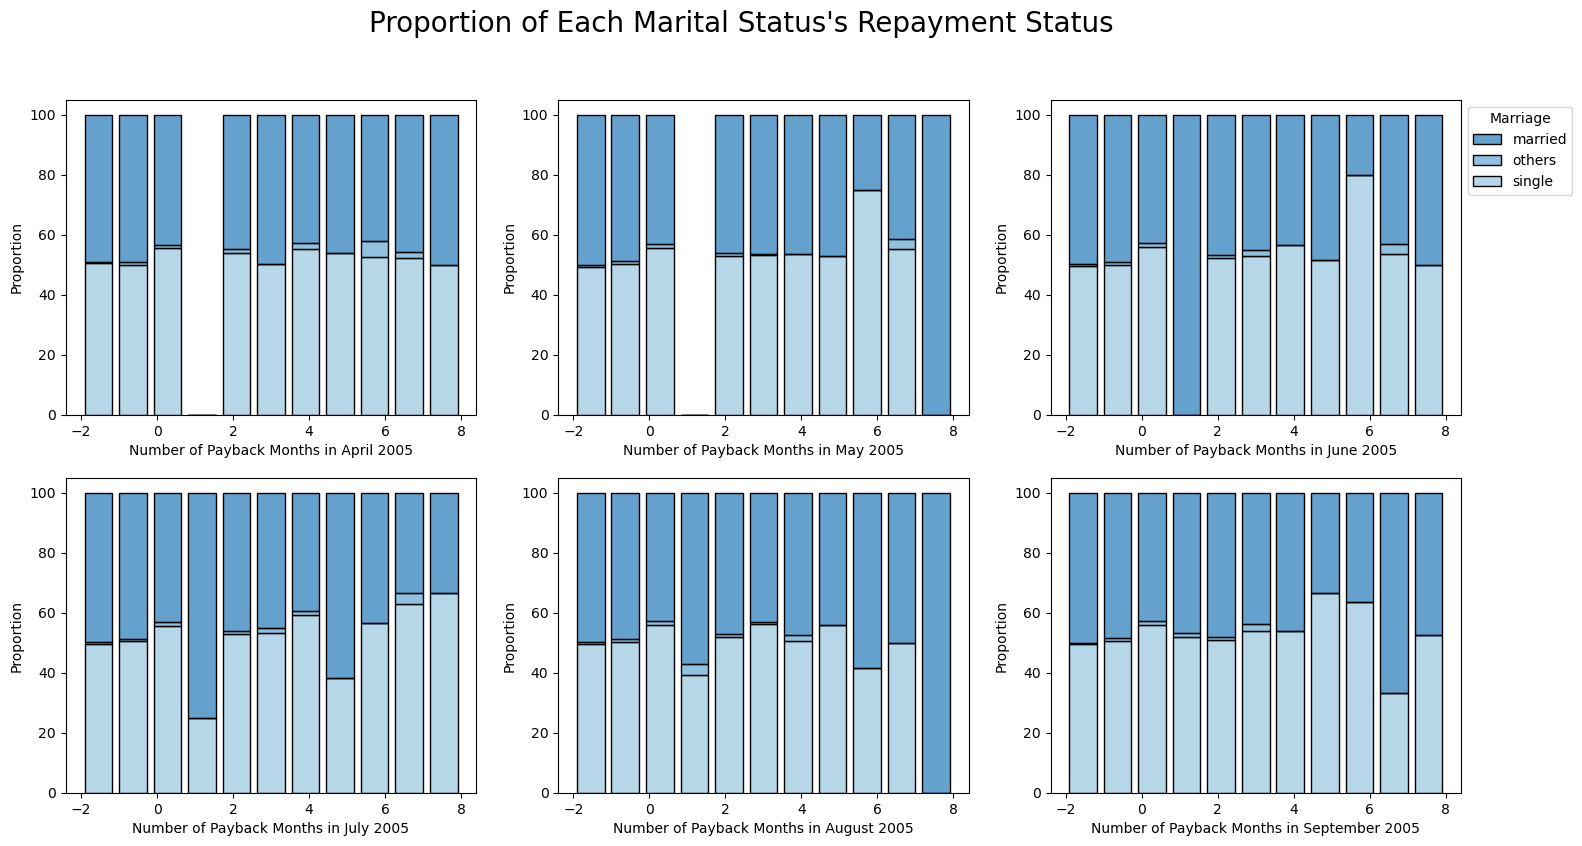

In [30]:
# Create grouped stacked bar charts for showing the percentage of each marital status's repayment status in each month. 

fig3=plt.figure(figsize=(18,9))
fig3.suptitle("Proportion of Each Marital Status's Repayment Status", fontsize=20)
plt.subplot(2,3,1)
ax13 = sns.histplot(pdf13(), x='Repayment_Status_April,2005', hue='Marriage', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax13.set_ylabel('Proportion')
ax13.set_xlabel('Number of Payback Months in April 2005')
ax13.get_legend().remove()
plt.subplot(2,3,2)
ax14 = sns.histplot(pdf14(), x='Repayment_Status_May,2005', hue='Marriage', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax14.set_ylabel('Proportion')
ax14.set_xlabel('Number of Payback Months in May 2005')
ax14.get_legend().remove()
plt.subplot(2,3,3)
ax15 = sns.histplot(pdf15(), x='Repayment_Status_June,2005', hue='Marriage', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax15.set_ylabel('Proportion')
ax15.set_xlabel('Number of Payback Months in June 2005')
legend = ax15.get_legend().set_bbox_to_anchor((1, 1))
plt.subplot(2,3,4)
ax16 = sns.histplot(pdf16(), x='Repayment_Status_July,2005', hue='Marriage', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax16.set_ylabel('Proportion')
ax16.set_xlabel('Number of Payback Months in July 2005')
ax16.get_legend().remove()
plt.subplot(2,3,5)
ax17 = sns.histplot(pdf17(), x='Repayment_Status_August,2005', hue='Marriage', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax17.set_ylabel('Proportion')
ax17.set_xlabel('Number of Payback Months in August 2005')
ax17.get_legend().remove()
plt.subplot(2,3,6)
ax18 = sns.histplot(pdf18(), x='Repayment_Status_September,2005', hue='Marriage', weights='Percentage',
             multiple='stack', palette='tab20c', shrink=0.8,bins=11)
ax18.set_ylabel('Proportion')
ax18.set_xlabel('Number of Payback Months in September 2005')
ax18.get_legend().remove()
plt.show()

#### Fig. 3
- The measurement scale for the repayment status (x-axis "Number of Payback Month" in this set of plots) is "-1" means pay duly, "1" means payment delay for one month, "2" means payment delay for two months, and so on.
- This set of stacked bar charts shows the percentage of clients using how many months to pay back their credit cards from April to September 2005 based on different marital statuses.
- From these plots, samples who are married or single relatively have the same proportion of paying one month early and paying on time. Single samples may have a little bit more percentage in delaying for six months except August 2005.  
- For my research question, I am interested in which marital status caused payment delays. These plots reflect clients with either marital status have the same influence on delayed repayment status.  

Text(0.5, 1.02, 'Distribution of Average Repayment Status by Age')

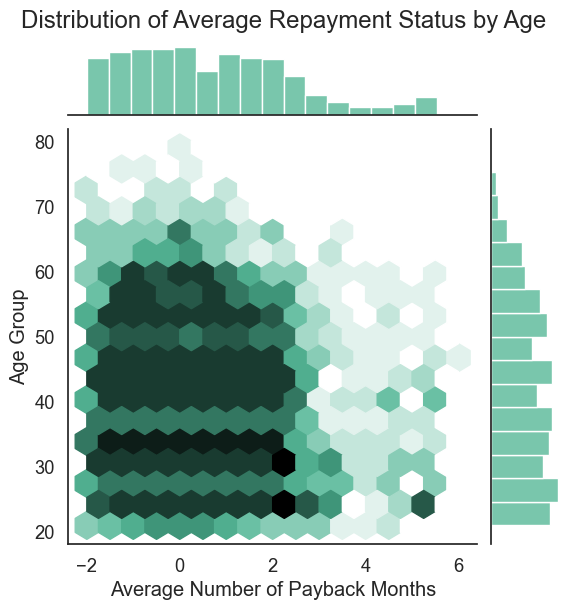

In [35]:
dfp19=df9.groupby(['Age','Average_Repayment_Status']).size().to_frame().reset_index()
dfp19.to_csv("../data/processed/processed_data_Remy/plot19_data.csv")
sns.set(style='white',font_scale=1.2)
plot19=sns.jointplot(y='Age',x='Average_Repayment_Status',kind="hex",data=dfp19,color="#4CB391")
plot19.ax_joint.set_xlabel('Average Number of Payback Months')
plot19.ax_joint.set_ylabel('Age Group')
plt.suptitle('Distribution of Average Repayment Status by Age',y=1.02)

#### Fig. 4
- The measurement scale for the repayment status (x-axis "Number of Payback Month" in this set of plots) is "-1" means pay duly, "1" means payment delay for one month, "2" means payment delay for two months, and so on.
- This hexbin plot shows the relationship between ages and average repayment status. It demonstrates the density of age mainly concentrated in the range of -2 to 2. There is one hexbin that stands out on the average number of delaying more than 4 months for the age group 20 to 30 and there are two hexbins that stand out on average numbers of delaying around two months for the age group 20 to early 30.
- The visualization illustrates most people in all age groups pay the bills early one month or delay them for two months.

### Conclusion
- Four different visualizations are here to show the relationships between features in personal profile and repayment status and I am interested to know what characteristics caused the payment delay to happen. 
- From the figures above, we can interpret that a person characterized as a married or single female who has a graduate school education level and is not aged between 20 and 30 will pay back their credit cards before the due month or on the due month. And an aged 20 to 30 male whether married or single who have a university education level will tend to delay their repayments. From a bank or financial institution's point of view, they maybe will prefer the first type of clients as they are reliable with decent credit history, but from clients' personal view, it can be better if the money is more move around or do investment in that period before the due date.    